<a href="https://colab.research.google.com/github/EladAriel/Tensorflow/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

In [1]:
# Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import mnist dataset
from tensorflow.keras.datasets import mnist

In [2]:
# Split data into training and test tests
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [3]:
# Show the first training example
print(f"Training sample:\n{X_train[0]}\n")
print(f"Training label:\n{y_train[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 2

In [4]:
# Check the shape of the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

* There are 60,000 training examples.

* Each training example with shape of (28,28)

* There are 10,000 test examples.

* Each test example with shape of (28,28)

## **Visualization**

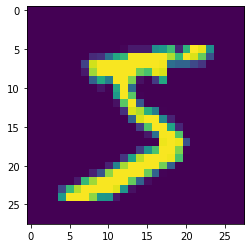

In [6]:
# Plot a single example
plt.imshow(X_train[0])

In [7]:
# Create a small list of class names
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', ' Six', 'Seven', 'Eight', 'Nine']

# The number of classes is:
print(f"Number of classes:\n{len(class_names)}")

Number of classes:
10


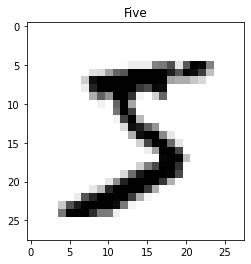

In [8]:
# Plot an example image and its label
plt.imshow(X_train[0], cmap=plt.cm.binary) # change the colours to black and white
plt.title(class_names[y_train[0]]);

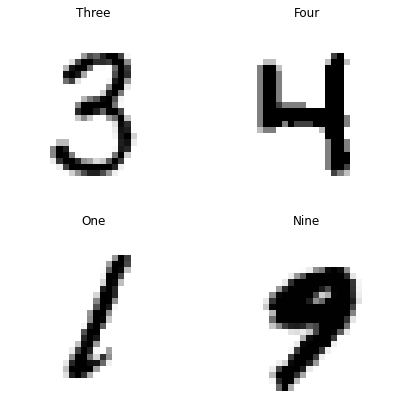

In [9]:
# plot multiple random images of MNIST
plt.figure(figsize=(7, 7))

for i in range(4):
  ax = plt.subplot(2, 2, i+1) # (2 rows, 2 columns, index=i+1)
  rand_index = random.choice(range(len(X_train))) # return random smaple's index
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary) # show random smaple in black & white
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build a model

**Goal**: Figure out the relationship between the pixel values and their labels.

**Model Architecture**:

* **Input shape**: Squash the input into a tensor (vector) of shape (28*28) = (784).

* **Output shape**: Is equal to` len(class_names)`. In our case there are 10 different classes.

* **Activation parameter**: "softmax"

* **Loss Function**: Sparse Categorical Crossentropy

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])

# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.9407 - accuracy: 0.2440 - val_loss: 1.7221 - val_accuracy: 0.3263
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5774 - accuracy: 0.3623 - val_loss: 1.4785 - val_accuracy: 0.3853
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3753 - accuracy: 0.4567 - val_loss: 1.1964 - val_accuracy: 0.5452
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1235 - accuracy: 0.5879 - val_loss: 1.0000 - val_accuracy: 0.7057
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9273 - accuracy: 0.7276 - val_loss: 0.8564 - val_accuracy: 0.7533
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8403 - accuracy: 0.7580 - val_loss: 0.8055 - val_accuracy: 0.7705
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8040 - accuracy: 0.7680 - val_loss: 0.7939 - val_accuracy

In [11]:
# Check the shapes of our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,250
Trainable params: 3,250
Non-trainabl

The model gets about ~78% accuracy after 10 epochs.

Data need to be normalized.

In [12]:
# Check the min and max values of the training data
X_train.min(), X_train.max()

(0, 255)

The pixels values are between 0 and 255.

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0

In [13]:
# normalize the train and test images by the maximum value
X_train = X_train / 255.0
X_test = X_test / 255.0

# Check the min and max values of the training data
X_train.min(), X_train.max()

(0.0, 1.0)

Running the model with the normalized data

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model
norm_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])

# Compile the model
norm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
norm_history = norm_model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4006 - accuracy: 0.5053 - val_loss: 0.9823 - val_accuracy: 0.6862
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8987 - accuracy: 0.7221 - val_loss: 0.8341 - val_accuracy: 0.7529
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7966 - accuracy: 0.7633 - val_loss: 0.7767 - val_accuracy: 0.7784
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7430 - accuracy: 0.7837 - val_loss: 0.7105 - val_accuracy: 0.7977
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6841 - accuracy: 0.7969 - val_loss: 0.6792 - val_accuracy: 0.7996
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6498 - accuracy: 0.8059 - val_loss: 0.6474 - val_accuracy: 0.8126
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6271 - accuracy: 0.8119 - val_loss: 0.6500 - val_accuracy:

We got higher accuracy value.

### plotting the model's history (loss curves)

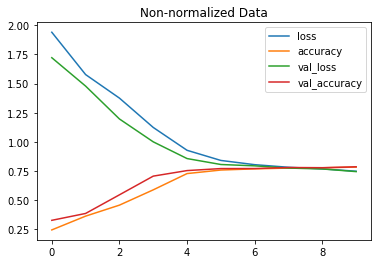

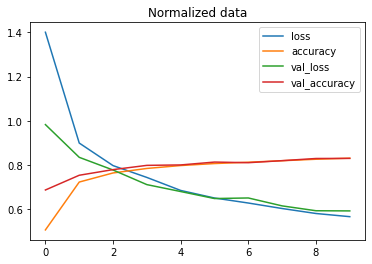

In [15]:
# Plot non-normalized data loss curves
pd.DataFrame(history.history).plot(title="Non-normalized Data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Comparing between the two plots, we can see how much quicker the model with the normalized data improved than the model with the non-normalized data.

### Find the ideal learning rate

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model
lr_norm_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])

# Compile the model
lr_norm_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Create a learning  rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

# Fit the model
find_lr_history = lr_norm_model.fit(X_train,
                    y_train,
                    epochs=40,
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4006 - accuracy: 0.5053 - val_loss: 0.9823 - val_accuracy: 0.6862 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8928 - accuracy: 0.7247 - val_loss: 0.8293 - val_accuracy: 0.7533 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7866 - accuracy: 0.7668 - val_loss: 0.7596 - val_accuracy: 0.7821 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7096 - accuracy: 0.7907 - val_loss: 0.7001 - val_accuracy: 0.7924 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6580 - accuracy: 0.8020 - val_loss: 0.6617 - val_accuracy: 0.8010 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6262 - accuracy: 0.8105 - val_loss: 0.6197 - val_accuracy: 0.8211 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

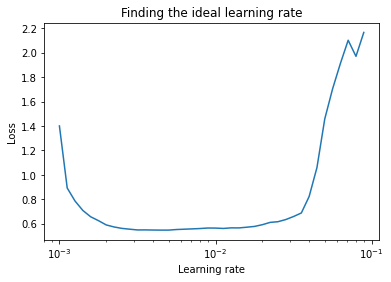

In [19]:
# Plot the learning rate decay curve
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # x-axis in log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

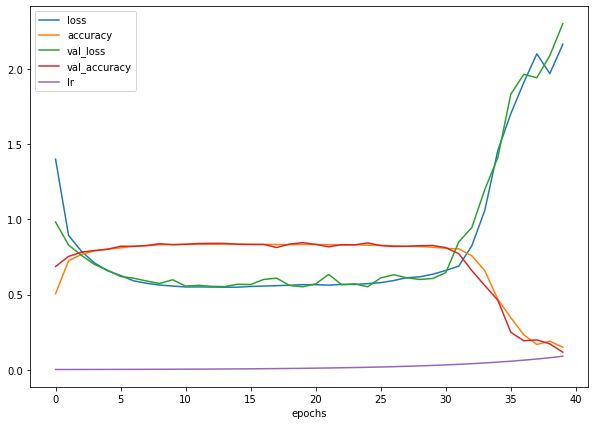

In [20]:
# Checkout the history
pd.DataFrame(find_lr_history.history).plot(figsize=(10,7), xlabel="epochs");

In this case, the ideal learning rate is: 0.001

### Refit the model

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model
refit_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")])

# Compile the model
refit_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["accuracy"])

# Fit the model
refit_history = refit_model.fit(X_train,
                    y_train,
                    epochs=20,
                    validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.4006 - accuracy: 0.5053 - val_loss: 0.9823 - val_accuracy: 0.6862
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8987 - accuracy: 0.7221 - val_loss: 0.8341 - val_accuracy: 0.7529
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7966 - accuracy: 0.7633 - val_loss: 0.7767 - val_accuracy: 0.7784
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7430 - accuracy: 0.7837 - val_loss: 0.7105 - val_accuracy: 0.7977
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6841 - accuracy: 0.7969 - val_loss: 0.6792 - val_accuracy: 0.7996
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6498 - accuracy: 0.8059 - val_loss: 0.6474 - val_accuracy: 0.8126
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6271 - accuracy: 0.8119 - val_loss: 0.6500 - val_accuracy: 0.8098
Epo

### Make some predictions

In [23]:
# Make predictions with the most recent model
y_probs = refit_model.predict(X_test) # probs is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[4.8733522e-08, 2.9244344e-04, 2.6996474e-06, 5.1796068e-03,
        3.1989105e-06, 7.9718401e-04, 9.7120587e-09, 9.7442347e-01,
        2.0235290e-03, 1.7277932e-02],
       [1.2027317e-08, 1.3582971e-10, 9.9599552e-01, 3.5698747e-03,
        6.5838649e-21, 1.2600598e-05, 5.4764860e-06, 2.0395688e-23,
        4.1655442e-04, 4.3936298e-24],
       [8.0023582e-10, 9.4662648e-01, 9.2475433e-03, 1.7846741e-03,
        4.3373516e-06, 1.7296410e-05, 9.1331094e-06, 2.5999404e-02,
        1.6304262e-02, 6.9360003e-06],
       [9.9684876e-01, 4.9320540e-14, 8.9917103e-07, 1.3295668e-08,
        2.9193816e-07, 1.1492970e-03, 1.9760621e-03, 5.8636063e-19,
        2.4765486e-05, 3.9352308e-10],
       [3.8446355e-04, 1.3121064e-03, 3.2760267e-04, 1.7930373e-05,
        8.5165459e-01, 1.6354230e-03, 6.4314404e-03, 5.2752747e-04,
        2.0992830e-02, 1.1671608e-01]], dtype=float32)

In [24]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(7, 'Seven')

In [25]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

### Create confusion matrix function

In [26]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

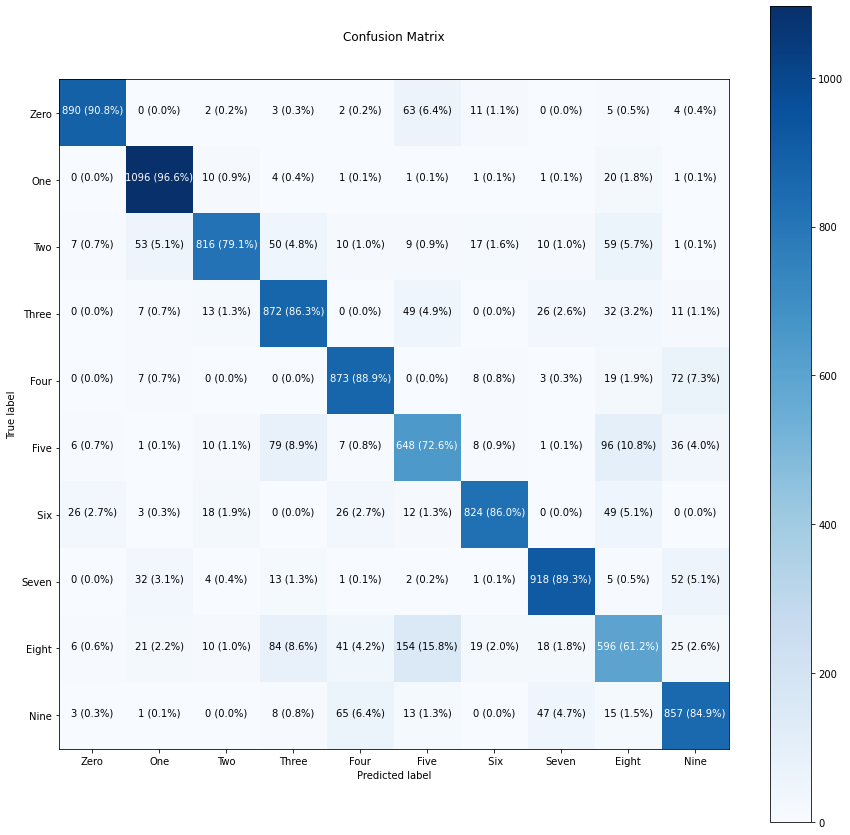

In [27]:
# Create confusion matrix
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

### Cretae a function to plot random image

In [28]:
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

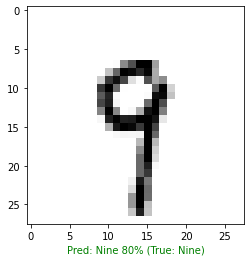

In [51]:
# Check out a random image as well as its prediction
plot_random_image(model=refit_model, 
                  images=X_test, 
                  true_labels=y_test, 
                  classes=class_names)

### Create Classification Report

In [52]:
# Create classification report
print(classification_report(y_test, y_preds, target_names=class_names))

              precision    recall  f1-score   support

        Zero       0.95      0.91      0.93       980
         One       0.90      0.97      0.93      1135
         Two       0.92      0.79      0.85      1032
       Three       0.78      0.86      0.82      1010
        Four       0.85      0.89      0.87       982
        Five       0.68      0.73      0.70       892
         Six       0.93      0.86      0.89       958
       Seven       0.90      0.89      0.89      1028
       Eight       0.67      0.61      0.64       974
        Nine       0.81      0.85      0.83      1009

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

